# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print("Wholesale customers dataset has {} samples with {} features each.".format(*data.shape))
except:
    print('Dataset could not be loaded. Is the dataset missing?')

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [2]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [3]:
# Select three indices of your choice you wish to sample from the dataset
indices = [4, 18, 142]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print("Chosen samples of wholesale customers dataset:")
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,22615,5410,7198,3915,1777,5185
1,18601,6327,10099,2205,2767,3181
2,37036,7152,8253,2995,20,3


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  

* What kind of establishment (customer) could each of the three samples you've chosen represent?

**Hint:** Examples of establishments include places like markets, cafes, delis, wholesale retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant. You can use the mean values for reference to compare your samples with. The mean values are as follows:

* Fresh: 12000.2977
* Milk: 5796.2
* Grocery: 3071.9
* Detergents_paper: 2881.4
* Delicatessen: 1524.8

Knowing this, how do your samples compare? Does that help in driving your insight into what kind of establishments they might be? 


**Answer:** To robustly conclude about the categories of selected samples, we compare the result with the statistics presented below (knowing only mean values gives us worse guess).

For customer with index = 4, 'Fresh', 'Frozen' and 'Delicatessen' are at top-25%, and 'Milk', 'Grocery' and 'Detergents_Paper' are at top-50%. I expect such a behavior for a **wholesale retailer**.

For customer with index = 18, 'Fresh' and 'Delicatessen' are at top-25%, and 'Milk', 'Frozen', 'Grocery' and 'Detergents_Paper' are at top-50%. Similar to the previous example, this is expected for a **wholesale retailer**.

For customer with index = 142, 'Fresh' is a top-25%, 'Milk', 'Grocery' and 'Frozen' are at top-50%, while 'Detergents_paper' is at bottom-25% (close to minimum) and 'Delicatessen' is at minimum value. So, this customer purchases different types of food (esp. **fresh**) but not with deli food. I would think it is either a **food market** or a **cafe** (also, as we see further, it can be a **restaurant** where the amount of 'Delicatessen' is **unknown** and thus set to the minimum value).

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

Consider **all** features and check whether they are actually relevant for understanding customer purchases with the help of DecisionTreeRegressor (**not forgetting about cross-validation**):

In [4]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor

# Make a copy of the DataFrame, using the 'drop' function to drop the given feature
for my_feature in data.columns.tolist():
    new_data = data.drop([my_feature], axis=1)

# Split the data into training and testing sets(0.25) using the given feature as the target
# Set a random state.

    X_train, X_test, y_train, y_test = train_test_split(new_data, 
                                                        data[my_feature], 
                                                        test_size = 0.2, 
                                                        random_state = 83)

# Create a decision tree regressor and fit it to the training set

    regressor = DecisionTreeRegressor(random_state=83)
    regressor.fit(X_train, y_train)

# Report the score of the prediction using the testing set
    score = cross_val_score(regressor, X_test, y_test, cv=10).mean()
    # score = regressor.score(X_test, y_test) # an alternative using DecisionTreeRegressor.score
    print("Testing score for feature", my_feature, "is", score)

Testing score for feature Fresh is -0.580052681882
Testing score for feature Milk is 0.154444614305
Testing score for feature Grocery is 0.634540710909
Testing score for feature Frozen is -7.80041699239
Testing score for feature Detergents_Paper is 0.527708735102
Testing score for feature Delicatessen is -0.980126789813


### Question 2

* Which feature did you attempt to predict? 
* What was the reported prediction score? 
* Is this feature necessary for identifying customers' spending habits?

**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data. If you get a low score for a particular feature, that lends us to beleive that that feature point is hard to predict using the other features, thereby making it an important feature to consider when considering relevance.

**Answer:** With the help of supervised learning model DecisionTreeRegression, I tried to predict the all single feature given the others. For **Grocery** and **Detergents_Paper** features, the obtained R^2 score is rather high (~0.5-0.6), so these two features **are likely to be predicted from the others** and thus **could be omitted** from further analysis. For the rest of features, testing score appears to be **close to zero** or even (for **Frozen**, **Delicatessen** and **Fresh**) **negative**, so these features are **very likely to be necessary** for our study. 

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

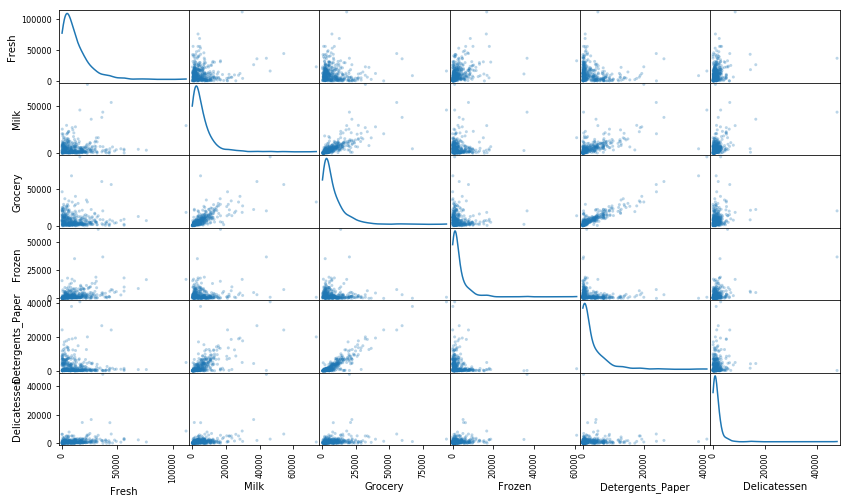

In [5]:
# Produce a scatter matrix for each pair of features in the data
pd.plotting.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 3
* Using the scatter matrix as a reference, discuss the distribution of the dataset, specifically talk about the normality, outliers, large number of data points near 0 among others. If you need to sepearate out some of the plots individually to further accentuate your point, you may do so as well.
* Are there any pairs of features which exhibit some degree of correlation? 
* Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? 
* How is the data for those features distributed?

**Hint:** Is the data normally distributed? Where do most of the data points lie? You can use [corr()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) to get the feature correlations and then visualize them using a [heatmap](http://seaborn.pydata.org/generated/seaborn.heatmap.html)(the data that would be fed into the heatmap would be the correlation values, for eg: `data.corr()`) to gain further insight.

**Answer:** From the scatter matrix, we can see that the dataset is **not normally distributed** in general; it also **contains some outliers** (see, for example, 'Frozen' vs. 'Detergents_Paper'). Notably, field 'Delicatessen' does not seem to correlate with any other feature. In contrast, some of the feature pairs ('Grocery' vs. 'Detergents_Paper,' 'Grocery' vs. 'Milk,' 'Milk' vs. 'Detergents_Paper') show a pretty significant correlation between them.

This behavior is **fully supported** by demonstrating correlations between different data columns:

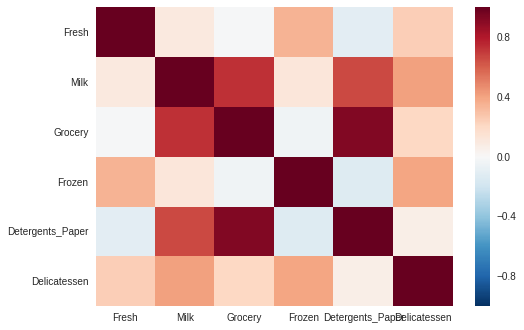

In [6]:
import seaborn
seaborn.heatmap(data.corr())

The three mutually correlated features ('Grocery,' 'Detergents_Paper' and 'Milk') are **the same** that the features with the largest R^2 score found earlier. It is expected because of the large R^2 score of a given means that this feature can be **predicted** from the other feature.

As expected, data distribution for all features is [skewed](https://en.wikipedia.org/wiki/Skewness) **positively** (i.e., towards **smaller** values), this can be immediately seen with the help of [skew](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.skew.html) command:

In [7]:
data.skew().sort_values()

Fresh                2.561323
Grocery              3.587429
Detergents_Paper     3.631851
Milk                 4.053755
Frozen               5.907986
Delicatessen        11.151586
dtype: float64

Note that for Gaussian (or normal) distribution the skewness is exactly 0, so skewness is the number that quantifies devation of a distribution of Gaussian.

As expected, 'Detergents_Paper' has the largest skewness because its distribution is closer to 0, as we can see from the bottom right figure of pd.plotting.scatter_matrix above. 

Note also that our three mutually correlated features ('Grocery,' 'Detergents_Paper' and 'Milk') have rather average (neither minimal nor maximal) amount of skewness.

Another characteristic that measures the deviation of data distribution from Gaussian is the fourth [standardized moment](https://en.wikipedia.org/wiki/Standardized_moment), [kurtosis](https://en.wikipedia.org/wiki/Kurtosis) :

In [8]:
data.kurtosis().sort_values(ascending=False)

Delicatessen        170.694939
Frozen               54.689281
Milk                 24.669398
Grocery              20.914670
Detergents_Paper     19.009464
Fresh                11.536408
dtype: float64

Again, our three mutually correlated features ('Grocery,' 'Detergents_Paper' and 'Milk') have rather average (neither minimal nor maximal) amount of kurtosis.

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

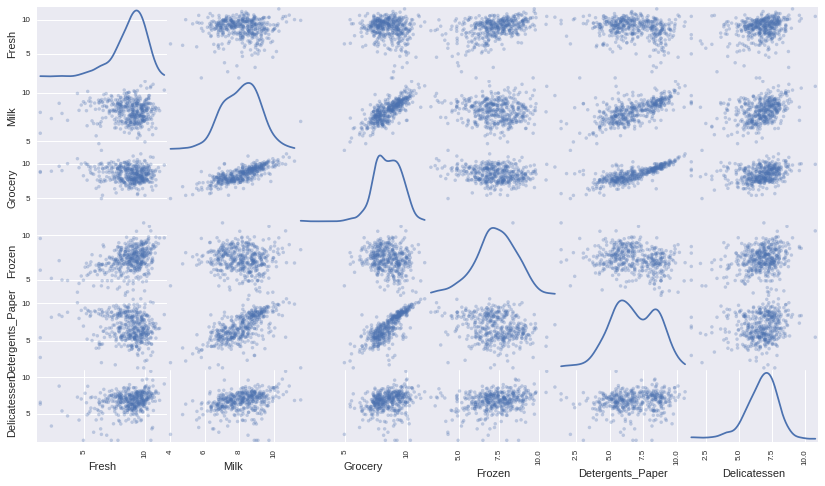

In [9]:
# Scale the data using the natural logarithm
log_data = pd.DataFrame(data = data)
skewed = log_data.columns
log_data[skewed] = log_data[skewed].apply(lambda x: np.log(x + 1))

# Scale the sample data using the natural logarithm
log_samples = pd.DataFrame(data = samples)
skewed = log_samples.columns
log_samples[skewed] = log_samples[skewed].apply(lambda x: np.log(x + 1))

# Produce a scatter matrix for each pair of newly-transformed features
pd.plotting.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

Not surprisingly, np.log(x + 1) transformation **decreases** both skewness and kurtosis:

In [10]:
log_data.skew().sort_values()

Fresh              -1.575326
Delicatessen       -1.091827
Grocery            -0.674938
Frozen             -0.352655
Detergents_Paper   -0.235961
Milk               -0.224063
dtype: float64

In [11]:
log_data.kurtosis().sort_values()

Detergents_Paper   -0.301082
Milk                0.210842
Frozen              0.269540
Delicatessen        2.748784
Grocery             3.161866
Fresh               4.052833
dtype: float64

Interestingly, after np.log(x+1) transformation, the skewness and kurtosis of 'Delicatessen' become "average," while the largest outlier is 'Fresh' which has the smallest skewness and kurtosis before the transformation. We can also see **clear 2-peaked structure** in some features, esp. 'Detergents_Paper', which can be **an indication of clustering**.

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [12]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,10.026413,8.596189,8.881697,8.272826,7.483244,8.553718
1,9.831024,8.752740,9.220291,7.698936,7.925880,8.065265
2,10.519673,8.875287,9.018453,8.005033,3.044522,1.386294


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [13]:
# For each feature find the data points with extreme high or low values

# OPTIONAL: Select the indices for data points you wish to remove
outliers = []

for feature in log_data.keys():
    
    # Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)

    # Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5*(Q3-Q1)
    
    # Display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))
    data_outliers = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    display(data_outliers)
    #print("Number of outliers is", data_outliers.shape[0])
    
    # collect outliers
    for item in data_outliers.index.tolist():
        outliers.append(item)
    #    if item not in outliers:
    #        outliers.append(item)
    #    else:
    #        outliers.remove(item)

print("Indices of all outliers:", outliers)

from collections import Counter

multiple_outliers = []

counter = Counter(outliers)
for item in counter:
    if counter[item] > 1:
        multiple_outliers.append(item)
print('*'*40)
print("Indices of multiple outliers:", np.sort(multiple_outliers))
print('*'*40)
print("Displaying multiple outliers again:")
display(log_data.iloc[multiple_outliers])
print('*'*40)
print("Because there is no reason to treat these outliers as anomalous records, I would consider not removing them")

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.454347,9.950371,10.732672,3.610918,10.095429,7.261225
66,2.302585,7.336286,8.911665,5.170484,8.151622,3.332205
81,5.393628,9.163354,9.575261,5.648974,8.964312,5.056246
95,1.386294,7.979681,8.740817,6.089045,5.411646,6.565265
96,3.178054,7.869784,9.001962,4.983607,8.262301,5.384495
128,4.948760,9.087947,8.249052,4.962845,6.968850,1.386294
171,5.303305,10.160569,9.894295,6.480045,9.079548,8.740497
193,5.198497,8.156510,9.918031,6.866933,8.633909,6.502790
218,2.944439,8.923325,9.629445,7.159292,8.475954,8.759826
304,5.087596,8.917445,10.117550,6.426488,9.374498,7.787797


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.040027,11.205027,10.377078,6.895683,9.907031,6.806829
98,6.222576,4.727388,6.658011,6.797940,4.043051,4.890349
154,6.434547,4.025352,4.927254,4.330733,2.079442,2.197225
356,10.029547,4.905275,5.389072,8.057694,2.302585,6.308098


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923241,7.037028,1.386294,8.391176,1.386294,6.883463
154,6.434547,4.025352,4.927254,4.330733,2.079442,2.197225


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.432071,9.663325,9.723763,3.526361,8.847504,6.073045
57,8.597482,9.203718,9.257987,3.663562,8.932345,7.156956
65,4.454347,9.950371,10.732672,3.610918,10.095429,7.261225
145,10.000614,9.034200,10.457171,3.761200,9.440817,8.396381
175,7.759614,8.967759,9.382191,3.970292,8.342125,7.437206
264,6.979145,9.177817,9.645105,4.127134,8.696343,7.143618
325,10.395681,9.728241,9.519808,11.016496,7.149132,8.632306
420,8.402231,8.569216,9.490091,3.258097,8.827468,7.239933
429,9.060447,7.467942,8.183397,3.871201,4.442651,7.824846
439,7.933080,7.437795,7.828436,4.189655,6.169611,3.970292


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923241,7.037028,1.386294,8.391176,1.386294,6.883463
161,9.428270,6.293419,5.648974,6.996681,1.386294,7.711549


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.302585,7.336286,8.911665,5.170484,8.151622,3.332205
109,7.249215,9.724959,10.274603,6.513230,6.729824,1.386294
128,4.948760,9.087947,8.249052,4.962845,6.968850,1.386294
137,8.035279,8.997271,9.021961,6.495266,6.582025,3.610918
142,10.519673,8.875287,9.018453,8.005033,3.044522,1.386294
154,6.434547,4.025352,4.927254,4.330733,2.079442,2.197225
183,10.514557,10.690831,9.912001,10.506026,5.480639,10.777789
184,5.793014,6.823286,8.457655,4.317488,5.814131,2.484907
187,7.799343,8.987572,9.192176,8.743532,8.149024,1.386294
203,6.369901,6.530878,7.703910,6.152733,6.861711,2.944439


Indices of all outliers: [65, 66, 81, 95, 96, 128, 171, 193, 218, 304, 305, 338, 353, 355, 357, 412, 86, 98, 154, 356, 75, 154, 38, 57, 65, 145, 175, 264, 325, 420, 429, 439, 75, 161, 66, 109, 128, 137, 142, 154, 183, 184, 187, 203, 233, 285, 289, 343]
****************************************
Indices of multiple outliers: [ 65  66  75 128 154]
****************************************
Displaying multiple outliers again:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.454347,9.950371,10.732672,3.610918,10.095429,7.261225
66,2.302585,7.336286,8.911665,5.170484,8.151622,3.332205
128,4.948760,9.087947,8.249052,4.962845,6.968850,1.386294
154,6.434547,4.025352,4.927254,4.330733,2.079442,2.197225
75,9.923241,7.037028,1.386294,8.391176,1.386294,6.883463


****************************************
Because there is no reason to treat these outliers as anomalous records, I would consider not removing them


### Question 4
* Are there any data points considered outliers for more than one feature based on the definition above? 
* Should these data points be removed from the dataset? 
* If any data points were added to the `outliers` list to be removed, explain why.

** Hint: ** If you have datapoints that are outliers in multiple categories think about why that may be and if they warrant removal. Also note how k-means is affected by outliers and whether or not this plays a factor in your analysis of whether or not to remove them.

**Answer:** As we see below, there are 5 customers (with indices 65, 66, 75, 128, and 154) that are outliers in two or even more features.

To decide whether to drop these outliers, we should carefully inspect their appearance. Following [this prescription](http://www.theanalysisfactor.com/outliers-to-drop-or-not-to-drop/), I have not found any **systematic** "unphysical" or "suspicious" outliers in multiple outliers' data that can be caused, for example, by **writing data errors**. 

On the contrast, I am confused **why** in **four different columns** ('Fresh', 'Grocery', 'Detergents_Paper' and 'Delicatessen') the minimal value is **3.0** (in initial data; this corresponds to 1.386294 after np.log(x+1) transformation), given that there is pretty small number of customers will small values:

In [14]:
for x in range(3,20):
    selected_data = log_data[(log_data.values == np.log(x+1))]
    print('*'*78)
    print(selected_data.shape[0], "rows having intial value = ", x, ":")
    print('*'*78)
    if selected_data.shape[0] > 0:
        print(selected_data)

******************************************************************************
9 rows having intial value =  3 :
******************************************************************************
         Fresh      Milk    Grocery    Frozen  Detergents_Paper  Delicatessen
75    9.923241  7.037028   1.386294  8.391176          1.386294      6.883463
75    9.923241  7.037028   1.386294  8.391176          1.386294      6.883463
95    1.386294  7.979681   8.740817  6.089045          5.411646      6.565265
109   7.249215  9.724959  10.274603  6.513230          6.729824      1.386294
128   4.948760  9.087947   8.249052  4.962845          6.968850      1.386294
142  10.519673  8.875287   9.018453  8.005033          3.044522      1.386294
161   9.428270  6.293419   5.648974  6.996681          1.386294      7.711549
187   7.799343  8.987572   9.192176  8.743532          8.149024      1.386294
338   1.386294  5.811141   8.856803  9.655154          2.772589      6.311735
****************************

For me, **it is unclear** why 8 customers have purchased **exactly 3 units of goods** (but no one has purchased 1, 2, 4, 6, etc.). Maybe this is **just an error in pre-processing data script that converted N/A to 3s?** 

Therefore, I decided **to drop** these outliers, see final_outliers list:

In [15]:
# Remove all 8 records with initial fields equal to 3.0:
x = 3
selected_data = log_data[(log_data.values == np.log(x+1))]
print(selected_data.index.unique())

outliers = selected_data.index.unique()
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)
print(len(outliers), "customers have been filtered,", good_data.shape[0], "remain")

Int64Index([75, 95, 109, 128, 142, 161, 187, 338], dtype='int64')
8 customers have been filtered, 432 remain


## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

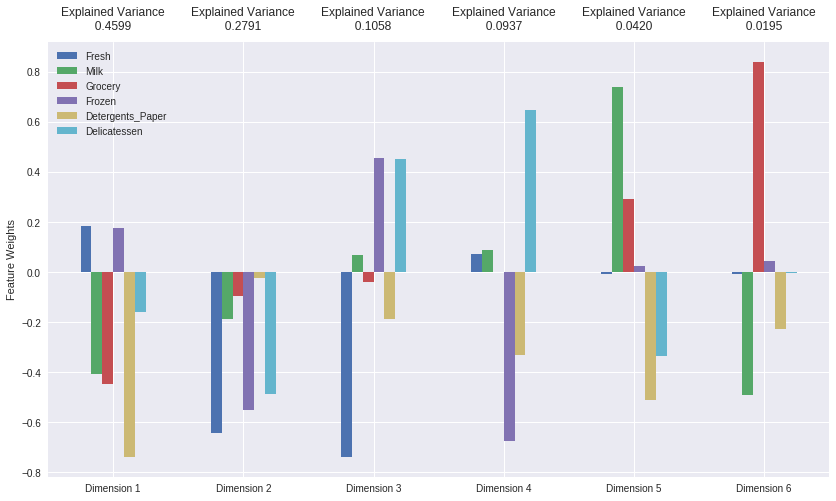

In [16]:
# Apply PCA by fitting the good data with the same number of dimensions as features
from sklearn.decomposition import PCA

pca = PCA(n_components=6)
pca.fit(good_data)

# Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

### Question 5

* How much variance in the data is explained* **in total** *by the first and second principal component? 
* How much variance in the data is explained by the first four principal components? 
* Using the visualization provided above, talk about each dimension and the cumulative variance explained by each, stressing upon which features are well represented by each dimension(both in terms of positive and negative variance explained). Discuss what the first four dimensions best represent in terms of customer spending.

**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the individual feature weights.

**Answer:** As we see, the first principal component explains ~46% of the variance and the second ~28% of the variance, so that ~74% of all variance is explained by the sum of these two components:

In [17]:
pca_results['Explained Variance'][0:2].sum()

0.739

Similarly, the first four components explain ~94% of the total variance in the data:

In [18]:
pca_results['Explained Variance'][0:4].sum()

0.9385

Earlier, we have found that **the features 'Milk', 'Grocery' and 'Detergents_Paper' mutually correlate**. Not surprisingly, the first dimension found by PCA is **mainly a combination of these three features**. Interestingly, the second and third dimensions appear to be the combination of **three other features** ('Fresh,' 'Frozen' and 'Delicatessen'). Finally, the fourth dimension is mainly the combination of 'Frozen,' 'Delicatessen' and 'Detergents_Paper'.

Let us try to **interpret these features** regarding the **customer spending**. 

- The first dimension suggests some customers that spend mainly on 'Detergents_Paper,' 'Grocery' and 'Milk'. We have seen it before in **Question 1**; this behavior probably corresponds to a **wholesale retailer**.
- The second dimension suggests some customers that spend mainly on food: 'Fresh,' 'Frozen' and 'Delicatessen' (with an addition of some 'Milk'). This behavior is expected for a **restaurant**.
- The third dimension represents customers that spend more on 'Fresh' (and less on 'Frozen' and 'Delicatessen') or vice versa. In the first case, it can be a **food market** or **cafe**.
- Finally, the fourth dimension represents customers that spend more on 'Delicatessen' and less on 'Detegrents_Paper' and 'Frozen' (maybe, a **deli cafe**), or vice versa.

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [19]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,-0.7536,-2.3820,0.2410,0.4504,-0.4549,0.0102
1,-1.3529,-1.7747,-0.1845,0.3738,-0.3161,0.0942
2,3.5430,0.9876,-2.6434,-2.4738,4.4269,0.9939


The results from PCA analysis show "deeper" structure than initial visual inspection. For example, by visual inspection, I have suggested that first two samples are roughly the same and correspond to **wholesale retailer** while there is a significant difference between the Dimension_1 / Dimension_2 ratios between these two samples, so there may be two different representatives of **wholesale retailer** given large scatter in the data.
The third sample is **hard to interpret** because it **has been removed as an outlier**. 

### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [20]:
# Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2)
pca.fit(good_data)

# Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [21]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,-0.7536,-2.3820
1,-1.3529,-1.7747
2,3.5430,0.9876


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

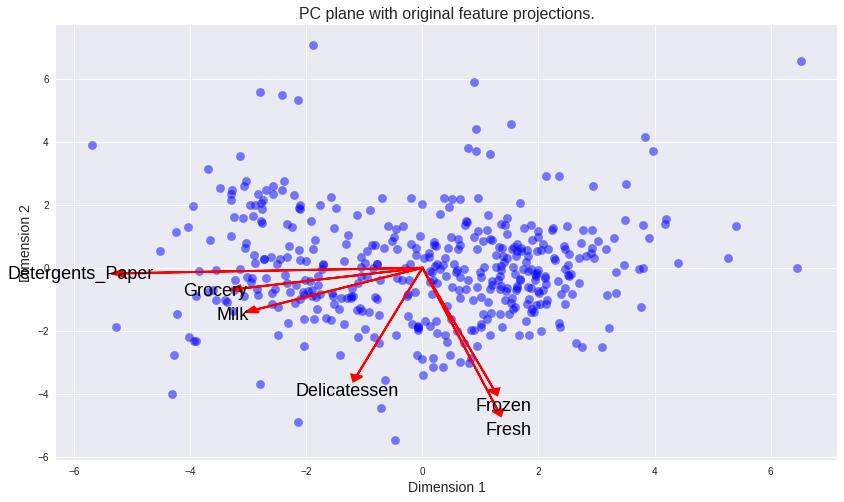

In [22]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

**Answer:** The original features that correlate with the first component (**Dimension 1**) are 'Detergents_Paper', 'Grocery' and 'Milk'. This behavior **coincides with what we have obtained before**.

The features that correlate with the second component (**Dimension 2**) are 'Fresh', 'Frozen' and 'Delicatessen'; again, this **coincides with our previous findings**.

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6

* What are the advantages to using a K-Means clustering algorithm? 
* What are the advantages to using a Gaussian Mixture Model clustering algorithm? 
* Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?

** Hint: ** Think about the differences between hard clustering and soft clustering and which would be appropriate for our dataset.

**Answer:** The [K-Means clustering](http://scikit-learn.org/stable/modules/clustering.html#k-means) algorithm is an example of [hard clustering](https://en.wikipedia.org/wiki/Cluster_analysis), while the [Gaussian Mixture Model](http://scikit-learn.org/stable/modules/mixture.html#gaussian-mixture) algorithm is an example of [soft clustering](https://en.wikipedia.org/wiki/Fuzzy_clustering). 

What is the difference between hard and soft clustering? In hard clustering, each sample is "adjusted" to a given cluster with exactly 100% probability, while for soft clustering this probability is smaller than 100%. As a result, I expect that soft clustering will treat more accurately "highly mixed" datasets which have a significant fraction of samples across the "borders." Given the samples distribution visualized before with the scatter_matrix, I would expect that a **soft clustering algorithm** (such as [Gaussian Mixture Model](http://scikit-learn.org/stable/modules/mixture.html#gaussian-mixture)) should give **better** results with customer segmentation.

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [23]:
# Apply your clustering algorithm of choice to the reduced data 
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score #, make_scorer

# from sklearn.model_selection import GridSearchCV

# It turns out that GridSearchCV does not work well because of failure of 
# silhouette_scorer = make_scorer(silhouette_score)
# see https://stackoverflow.com/questions/42257262/scikit-learn-gridsearchcv-fails-to-fit-em-model-with-silhouette-score-due-to-cry
# so I proceed with "manual" checking of n_components
#
# param_clusters = {'n_components': range(2,6)}
# clusterer = GridSearchCV(GaussianMixture(random_state=83, n_init=10), 
#                         param_grid=param_clusters,
#                         cv=10)
# clusterer.fit(reduced_data)
# clusterer = clusterer.best_estimator_
max_score = 0
for n_clusters in range(2,21):
    
    clusterer = GaussianMixture(random_state=83, n_init=10, n_components=n_clusters)
    clusterer.fit(reduced_data)

    

    
    preds = clusterer.predict(reduced_data)
# Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data, preds)
    print("For our model with", clusterer.n_components, "clusters, the sihlouette score is", score)
    if max_score < score:
        best_clusterer = clusterer
        # Predict the cluster for each data point
        best_preds = best_clusterer.predict(reduced_data)
        # Predict the cluster for each transformed sample data point
        best_sample_preds = best_clusterer.predict(pca_samples)
        # Find the cluster centers
        best_centers = clusterer.means_
        max_score = score
        best_clusters = n_clusters
print('*'*68)
print("Our best model has", best_clusters, "clusters and sihlouette is", max_score)
centers = best_centers
preds = best_preds
sample_preds = best_sample_preds

For our model with 2 clusters, the sihlouette score is 0.425261148057
For our model with 3 clusters, the sihlouette score is 0.408961240102
For our model with 4 clusters, the sihlouette score is 0.296604958483
For our model with 5 clusters, the sihlouette score is 0.313443607084
For our model with 6 clusters, the sihlouette score is 0.28043314202
For our model with 7 clusters, the sihlouette score is 0.217051299815
For our model with 8 clusters, the sihlouette score is 0.251445234006
For our model with 9 clusters, the sihlouette score is 0.296278043496
For our model with 10 clusters, the sihlouette score is 0.307186687807
For our model with 11 clusters, the sihlouette score is 0.324092913346
For our model with 12 clusters, the sihlouette score is 0.327226627064
For our model with 13 clusters, the sihlouette score is 0.31354350515
For our model with 14 clusters, the sihlouette score is 0.299705668851
For our model with 15 clusters, the sihlouette score is 0.321635455592
For our model wi

### Question 7

* Report the silhouette score for several cluster numbers you tried. 
* Of these, which number of clusters has the best silhouette score?

**Answer:** As we see, **the model with 2 clusters produces the best silhouette score** (0.425). For a larger number of clusters, silhouette score is typically about 0.25-0.35.

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

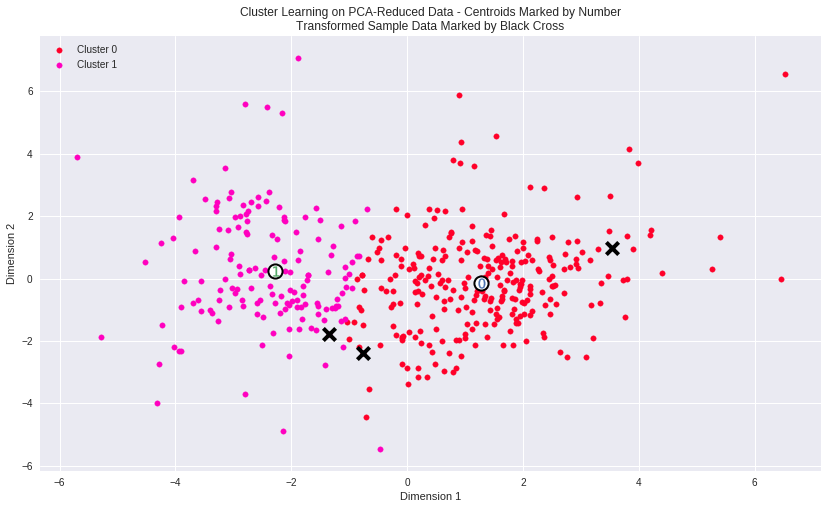

In [24]:
# Display the results of the clustering from implementation

vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [25]:
# Inverse transform the centers
log_centers = pca.inverse_transform(centers)
#print(log_centers)

# Exponentiate the centers
true_centers = np.exp(log_centers)-1
#print(true_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,8894.0,2058.0,2703.0,1991.0,365.0,718.0
Segment 1,3636.0,8171.0,12674.0,872.0,4929.0,1063.0


### Question 8

* Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project(specifically looking at the mean values for the various feature points). What set of establishments could each of the customer segments represent?

**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`. Think about what each segment represents in terms their values for the feature points chosen. Reference these values with the mean values to get some perspective into what kind of establishment they represent.

**Answer:** Compared to 'Segment 1', 'Segment 0' cluster has larger values 'Fresh' and 'Frozen' categories (that belong to top-50% of the whole dataset), and smaller values of all other categories (esp. 'Detergents_Paper') that belong to bottom-50% of the entire dataset. Therefore, the behavior of 'Segment 0' is expected for such customers as **cafe**, **restaurant**, **market**, **food store**. On the other hand, 'Segment 1' describes customers such as **grocery store** and **wholesale retailer**.

### Question 9

* For each sample point, which customer segment from* **Question 8** *best represents it? 
* Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [26]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print("Sample point", i, "predicted to be in Cluster", pred)

Sample point 0 predicted to be in Cluster 0
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 0


**Answer:** Interestingly, our GaussianMixture model prediction is **different** from my initial (naive) classification, where the first and the second test customers (sample points 0 and 1) are identified as **wholesale retailers** while the third customer (sample point 2) is probably a **food marked** or a **cafe**.

The difference between two predictions is at **sample point 0**. As we see from **cluster visualization**, it is located very close to borders between two clusters so that **such misidentification is expected**.

An important strength of the [GaussianMixture algorithm](http://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html#sklearn.mixture.GaussianMixture) is that it predicts **classification probabilities** for each sample:

In [27]:
best_clusterer.predict_proba(pca_samples)

array([[  6.53871410e-01,   3.46128590e-01],
       [  3.78100012e-01,   6.21899988e-01],
       [  9.99996499e-01,   3.50093025e-06]])

As we see, **it is rather probable to misclassify sample points 0 and 1**.

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. 

* How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*

**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:** The distributor should use identifiers of customer segments to label its data and should compare the outcome of A/B tests for each group of customers. After such a comparison, it should be determined which customer segments react positively and that the planned change should be introduced to these customer segments.

In other words, **segmentation and targeting** of A/B test should be made based upon the identified customer segments.

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
* How can the wholesale distributor label the new customers using only their estimated product spending and the **customer segment** data?

**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:** After adding an engineered feature (a **customer segment**), the data becomes **labeled**, so the wholesale distributor can use a **supervised classifier** to label new customers with the new **target variable** - a **customer segment**.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

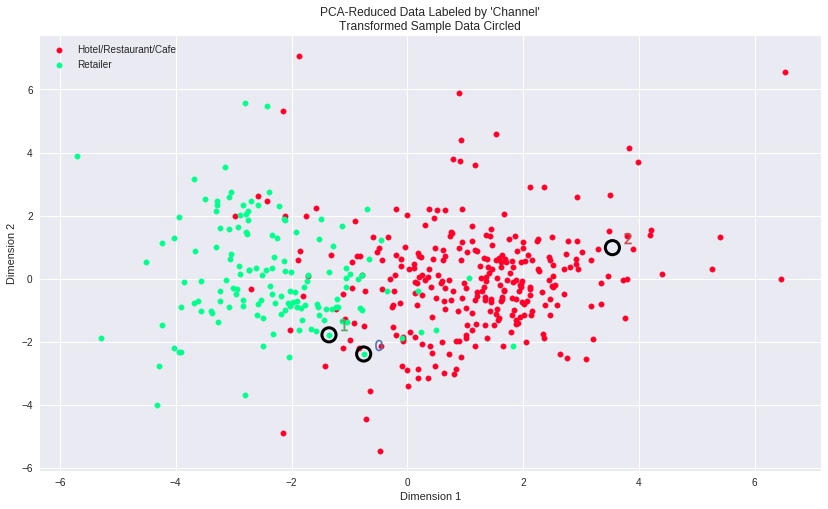

In [28]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12

* How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? 
* Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? 
* Would you consider these classifications as consistent with your previous definition of the customer segments?

**Answer:** As we see from the above figure, there is a **remarkable similarity** with the clustering algorithm and the obtained number of clusters (2). Indeed, there is one misclassification in our subset of 3 samples (and one more subset is excluded as an outlier), but it is expected given that two of the samples in our subset are (unintentionally) chosen quite close to border between 'Hotel/Restaurant/Cafe' and 'Retail' customers. 

Notably, the more detailed comparison reveals that **real clusters tend to be noisier than predicted clusters**, i.e., there are more 'Retailers' in 'Hotels/Restaurants/Cafes' area and vice versa, compared to the GaussianMixture model prediction. Again, this is expected because the "best-fit" models tend to have less variance than the "raw" data (this can be immediately seen in, e.g., our previous Udacity MLND project with [KNearestNeightbours classifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html).

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.